<a href="https://colab.research.google.com/github/verneh/opencv/blob/main/manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

## Libraries

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Augmentation

link to understanding: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generation

more techniques. https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

shearing tutorial.
https://stackoverflow.com/questions/47826730/how-to-save-resized-images-using-imagedatagenerator-and-flow-from-directory-in-k

In [ ]:
def show_image(iterator):
    # generate samples and plot
    for i in range(9):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
    plt.show()

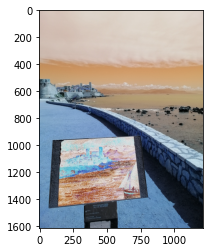

In [ ]:
# load and display the original image
path = '/content/drive/MyDrive/ImageDataGenerator/antibes.jpg' 
img = cv.imread(path) 
plt.imshow (img) 

## Types of Preprocessing

In [ ]:
# shear_range 
s_gen = ImageDataGenerator(shear_range = 15)
iterator = s_gen.flow(samples, batch_size=1)

In [ ]:
# rotation range
r_gen = ImageDataGenerator(rotation_range = 50)
iterator = r_gen.flow(samples, batch_size=1)

In [ ]:
# zoom range 
z_gen = ImageDataGenerator(zoom_range = [0.5,1.5])
iterator = z_gen.flow(samples, batch_size=1)

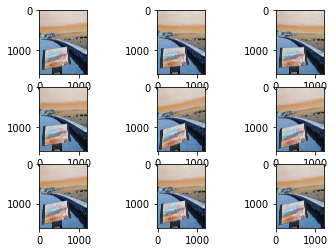

In [ ]:
# display subplot images
show_image(iterator)

In [ ]:
# read image
data = img_to_array(img) 
samples = np.expand_dims(data, 0)

In [ ]:
# pick place to save
save_test = '/content/drive/MyDrive/ImageDataGenerator/test'

In [ ]:
datagen.fit(samples)

In [ ]:
# loop to produce jpg files
for x, val in zip(z_gen.flow(samples, # our image
        save_to_dir=save_test,          # where we save the files
        save_prefix='aug',              # it will save the images as 'aug_0912' or some number for every new augmented image
        save_format='jpg'),range(10)):
  pass     # here we define a range because we want 10 augmented images otherwise it will keep looping forever.


In [ ]:
# alternate way
dataset=ImageDataGenerator()
image = dataset.flow_from_directory('/content/drive/MyDrive/ImageDataGenerator',target_size=(256,256),save_to_dir='/content/drive/MyDrive/ImageDataGenerator/test',class_mode='binary',save_prefix='N',save_format='jpeg',batch_size=5)
image.next()

Found 0 images belonging to 3 classes.


(array([], shape=(0, 256, 256, 3), dtype=float32), array([], dtype=float32))